In [19]:
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [20]:
country_april = pd.read_csv('final_country_apr.csv')
country_january = pd.read_csv('final_country_jan.csv')
country_february = pd.read_csv('final_country_feb.csv')
country_march = pd.read_csv('final_country_mrch.csv')
country_january


,Unnamed: 0,Passengers Last-Y %,Passengers Last-Y,Passengers_P,Passengers,Country
0,1,23.74%,"20,703",15.94%,"67,021",UNITED STATES
1,2,19.15%,"16,702",12.25%,"51,530",TURKEY
2,3,9.50%,"8,288",5.93%,"24,959",FRANCE
3,4,7.07%,"6,170",5.90%,"24,835",UKRAINE
4,5,4.92%,"4,295",5.37%,"22,591",GERMANY
5,6,11.26%,"9,822",5.13%,"21,575",UNITED ARAB EMIRATES
6,7,0.26%,235,4.14%,"17,421",ITALY
7,8,0.05%,51,4.03%,"16,961",GEORGIA
8,9,4.01%,"3,501",3.70%,"15,570",UNITED KINGDOM
9,10,1.73%,"1,511",3.64%,"15,330",AUSTRIA


In [21]:
country_january['Passengers'] = country_january.Passengers.str.replace(',','')
country_january['Passengers_P'] = country_january.Passengers_P.str.replace('%','')
country_january["Passengers"] = country_january["Passengers"].astype(str).astype(np.int64)
country_january["Passengers_P"] = country_january["Passengers_P"].astype(str).astype(float)
country_february['Passengers'] = country_february.Passengers.str.replace(',','')
country_february['Passengers_P'] = country_february.Passengers_P.str.replace('%','')
country_february["Passengers"] = country_february["Passengers"].astype(str).astype(np.int64)
country_february["Passengers_P"] = country_february["Passengers_P"].astype(str).astype(float)
country_march['Passengers'] = country_march.Passengers.str.replace(',','')
country_march['Passengers_P'] = country_march.Passengers_P.str.replace('%','')
country_march["Passengers"] = country_march["Passengers"].astype(str).astype(np.int64)
country_march["Passengers_P"] = country_march["Passengers_P"].astype(str).astype(float)
country_april['Passengers'] = country_april.Passengers.str.replace(',','')
country_april['Passengers_P'] = country_april.Passengers_P.str.replace('%','')
country_april["Passengers"] = country_april["Passengers"].astype(str).astype(np.int64)
country_april["Passengers_P"] = country_april["Passengers_P"].astype(str).astype(float)
#country_january['Passengers'] = pd.to_numeric(country_january['Passengers'])
country_january.dtypes

Unnamed: 0               int64
Passengers Last-Y %     object
Passengers Last-Y       object
Passengers_P           float64
Passengers               int64
Country                 object
dtype: object

In [22]:
country_january = country_january.drop([39])
country_march = country_march.drop([46])
country_april = country_april.drop([50])
#country_april

In [23]:
data_uk = {
   'January': country_january.loc[country_january.Country == 'UNITED KINGDOM','Passengers'].tolist(),
      'February': country_february.loc[country_february.Country == 'UNITED KINGDOM','Passengers'].tolist(),
      'March': country_march.loc[country_march.Country == 'UNITED KINGDOM','Passengers'].tolist(),
    'April': country_april.loc[country_april.Country == 'UNITED KINGDOM','Passengers'].tolist()
}
uk_passengers = pd.DataFrame(data_uk)
uk_passengers = uk_passengers.rename(index={0: 'Passengers'})
uk_passengers = uk_passengers.T
uk_passengers

,Passengers
January,15570
February,56639
March,72279
April,101382


In [24]:
data_usa = {
   'January': country_january.loc[country_january.Country == 'UNITED STATES','Passengers'].tolist(),
      'February': country_february.loc[country_february.Country == 'UNITED STATES','Passengers'].tolist(),
      'March': country_march.loc[country_march.Country == 'UNITED STATES','Passengers'].tolist(),
    'April': country_april.loc[country_april.Country == 'UNITED STATES','Passengers'].tolist()
}
usa_passengers = pd.DataFrame(data_usa)
usa_passengers = usa_passengers.rename(index={0: 'Passengers'})
usa_passengers = usa_passengers.T
usa_passengers

,Passengers
January,67021
February,158042
March,138965
April,157853


In [25]:
plt.figure(figsize=(1,1))
ax = uk_passengers[0].plot(color=['blue'])
plt.title('UK Passengers 2021')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

KeyError: 0

<Figure size 72x72 with 0 Axes>

In [26]:
plt.figure(figsize=(10,10))
ax = usa_passengers[0].plot(color=['blue'])
plt.title('USA Passengers 2021')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

KeyError: 0

<Figure size 720x720 with 0 Axes>

In [27]:
Total_jan = country_january['Passengers'].sum()
Total_feb = country_february['Passengers'].sum()
Total_mrch = country_march['Passengers'].sum()
Total_apr = country_april['Passengers'].sum()
data = [['January', Total_jan], ['February', Total_feb], ['March', Total_mrch], ['April', Total_apr]]
df_pass = pd.DataFrame(data, columns=['Month', 'Passengers'])
df_pass = df_pass.set_index('Month')
df_pass

,Passengers
Month,
January,420438
February,1121267
March,1214734
April,1557914


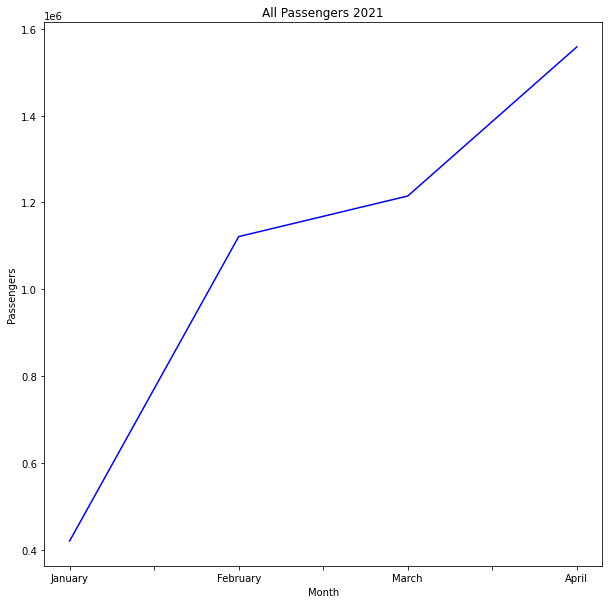

In [28]:
plt.figure(figsize=(10,10))
ax = df_pass["Passengers"].plot(color=['blue'])
plt.title('All Passengers 2021')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

In [29]:
company_april = pd.read_csv('final_company_apr.csv')
company_january = pd.read_csv('final_company_jan.csv')
company_february = pd.read_csv('final_company_feb.csv')
company_march = pd.read_csv('final_company_mrch.csv')
company_april

,Unnamed: 0,Passengers_P,Passengers,Company
0,2,22.21%,"865,072",EL AL ISRAEL AIRLINES
1,3,9.13%,"355,519",RYANAIR
2,4,7.00%,"272,847",TURKISH AIRLINES
3,5,5.42%,"211,420",EASYJET
4,6,4.75%,"184,997",WIZZAIR
...,...,...,...,...
77,16,NaN,157,CATHAY PACIFIC\rAIRWAYS
78,17,NaN,126,PRIVILEG STYLE
79,18,NaN,110,WIND ROSE AVIATION Co.\rLt
80,19,0.31%,"12,095",NaN


In [30]:
company_january['Passengers'] = company_january.Passengers.str.replace(',','')
company_january["Passengers"] = company_january["Passengers"].astype(str).astype(np.int64)
company_february['Passengers'] = company_february.Passengers.str.replace(',','')
company_february["Passengers"] = company_february["Passengers"].astype(str).astype(np.int64)
company_march['Passengers'] = company_march.Passengers.str.replace(',','')
company_march["Passengers"] = company_march["Passengers"].astype(str).astype(np.int64)
company_april['Passengers'] = company_april.Passengers.str.replace(',','')
company_april["Passengers"] = company_april["Passengers"].astype(str).astype(np.int64)
#country_january['Passengers'] = pd.to_numeric(country_january['Passengers'])
company_january

,Unnamed: 0,Passengers_P,Passengers,Company
0,1,21.30%,89575,EL AL ISRAEL AIRLINES
1,2,10.03%,42204,RYANAIR
2,3,6.77%,28505,TURKISH AIRLINES
3,4,6.05%,25471,UNITED AIRLINES
4,5,5.26%,22144,PEGASUS AIRLINES
5,6,4.59%,19310,WIZZAIR
6,7,4.10%,17246,ISRAIR AIRLINES
7,8,3.88%,16334,UKRAINE INTL AIR
8,9,3.68%,15489,LUFTHANSA
9,10,2.81%,11825,FLYDUBAI


In [31]:
data_elal = {
   'January': company_january.loc[company_january.Company == 'EL AL ISRAEL AIRLINES','Passengers'].tolist(),
      'February': company_february.loc[company_february.Company == 'EL AL ISRAEL AIRLINES','Passengers'].tolist(),
      'March': company_march.loc[company_march.Company == 'EL AL ISRAEL AIRLINES','Passengers'].tolist(),
    'April': company_april.loc[company_april.Company == 'EL AL ISRAEL AIRLINES','Passengers'].tolist()
}
elal_passengers = pd.DataFrame(data_elal)
elal_passengers = elal_passengers.rename(index={0: 'Passengers'})
elal_passengers = elal_passengers.T
elal_passengers

,Passengers
January,89575
February,232229
March,522179
April,865072


In [32]:
plt.figure(figsize=(10,10))
ax = elal_passengers[0].plot(color=['blue'])
plt.title('EL-AL Passengers 2022')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

KeyError: 0

<Figure size 720x720 with 0 Axes>

In [33]:
data_turkish = {
   'January': company_january.loc[company_january.Company == 'TURKISH AIRLINES','Passengers'].tolist(),
      'February': company_february.loc[company_february.Company == 'TURKISH AIRLINES','Passengers'].tolist(),
      'March': company_march.loc[company_march.Company == 'TURKISH AIRLINES','Passengers'].tolist(),
    'April': company_april.loc[company_april.Company == 'TURKISH AIRLINES','Passengers'].tolist()
}
turkish_passengers = pd.DataFrame(data_turkish)
turkish_passengers = turkish_passengers.rename(index={0: 'Passengers'})
turkish_passengers =  turkish_passengers.T
turkish_passengers

,Passengers
January,28505
February,82150
March,166446
April,272847


In [34]:
plt.figure(figsize=(10,10))
ax = turkish_passengers[0].plot(color=['blue'])
plt.title('Turkish Airlines Passengers 2022')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

KeyError: 0

<Figure size 720x720 with 0 Axes>

In [35]:
Total_jan_comp = company_january['Passengers'].sum()
Total_feb_comp = company_february['Passengers'].sum()
Total_mrch_comp = company_march['Passengers'].sum()
Total_apr_comp = company_april['Passengers'].sum()
data = [['January', Total_jan_comp], ['February', Total_feb_comp], ['March', Total_mrch_comp], ['April', Total_apr_comp]]
df_pass_comp = pd.DataFrame(data, columns=['Month', 'Passengers'])
df_pass_comp = df_pass_comp.set_index('Month')
df_pass_comp

,Passengers
Month,
January,840876
February,1121267
March,2327822
April,7787780


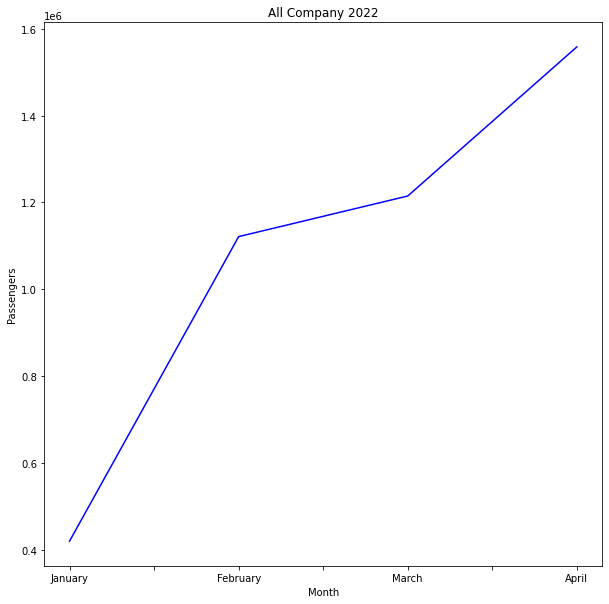

In [36]:
plt.figure(figsize=(10,10))
ax = df_pass["Passengers"].plot(color=['blue'])
plt.title('All Company 2022')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

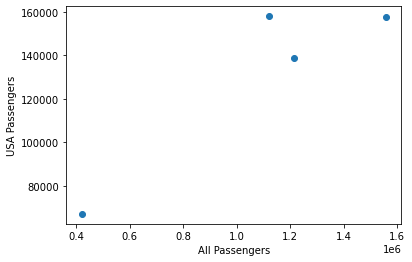

In [37]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_pass.Passengers, usa_passengers.Passengers)
plt.xlabel('All Passengers')
plt.ylabel('USA Passengers')
plt.show()

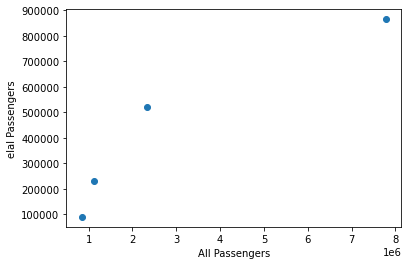

In [38]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_pass_comp.Passengers, elal_passengers.Passengers)
plt.xlabel('All Passengers')
plt.ylabel('elal Passengers')
plt.show()